In [1]:
import h5py
import matplotlib.pyplot as plt

In [2]:
def get_embedding(writer_csv, character_csv):
    writers = {}
    characters = {}
    with open(writer_csv, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            writers[line.split(',')[0]] = int(line.split(',')[1])

    with open(character_csv, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            characters[line.split(',')[0]] = int(line.split(',')[1])

    return characters, writers

In [3]:
def data_loader(data_path):
    f = h5py.File(data_path, 'r')
    data_images = f['image']
    data_character = f['character_label']
    data_writer = f['writer_label']

    return data_images, data_character, data_writer

In [4]:
type_suffix = 'simple'
data_path = './chenzhongjian_%s.hdf5' % type_suffix
writer_csv = './label_writer_%s.csv' % type_suffix
character_csv = './label_character_%s.csv' % type_suffix
data_images, data_character, data_writer = data_loader(data_path)
characters, writers = get_embedding(writer_csv, character_csv)

In [5]:
print('Total number of images: %d' % len(data_images))
print('Total number of writers: %d' % len(writers))
print('Total number of characters: %d' % len(characters))
print('Image size: %d×%d' % (len(data_images[0]), len(data_images[0][0])))

Total number of images: 138500
Total number of writers: 19
Total number of characters: 7328
Image size: 140×140


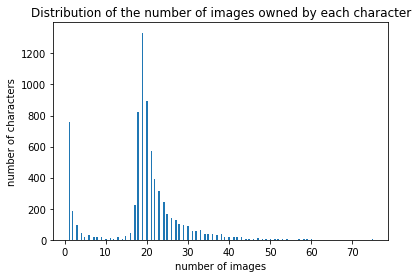

In [6]:
character_number = {}
for item in characters.values():
    character_number[item] = 0
# print(character_number)

for i in range(0, len(data_images)):
    character_number[data_character[i]] += 1

plt.figure()
plt.title('Distribution of the number of images owned by each character')
plt.hist(list(character_number.values()), bins=200)
plt.xlabel('number of images')
plt.ylabel('number of characters')
plt.show()